In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Baca Data

In [2]:
data = pd.read_csv('post natal data.csv')
data

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1498,6/15/2022 0:35,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,6/15/2022 0:35,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,6/15/2022 0:35,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,6/15/2022 0:36,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


# Hapus Kolom Timestamp karena tidak dibutuhkan

In [3]:
data.drop('Timestamp', axis=1, inplace=True)
data

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


# Melihat keunikan tiap kolom

In [4]:
for col in data:
    print(col, data[col].unique())

Age ['35-40' '40-45' '30-35' '45-50' '25-30']
Feeling sad or Tearful ['Yes' 'No' 'Sometimes']
Irritable towards baby & partner ['Yes' 'No' 'Sometimes' nan]
Trouble sleeping at night ['Two or more days a week' 'No' 'Yes']
Problems concentrating or making decision ['Yes' 'No' 'Often' nan]
Overeating or loss of appetite ['Yes' 'No' 'Not at all']
Feeling anxious ['Yes' 'No']
Feeling of guilt ['No' 'Yes' 'Maybe' nan]
Problems of bonding with baby ['Yes' 'Sometimes' 'No']
Suicide attempt ['Yes' 'No' 'Not interested to say']


# Melihat total data kosong

In [5]:
data.isna().sum()

Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

# Menghapus semua baris data yang kosong

In [6]:
data.dropna(axis=0, inplace=True)
data

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1498,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No
1500,25-30,No,Sometimes,Two or more days a week,No,No,No,Yes,No,Not interested to say
1501,25-30,No,Sometimes,Yes,Often,No,Yes,No,No,No


In [7]:
data.isna().sum().sum()

0

# Menganalisa plot dari tiap data

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


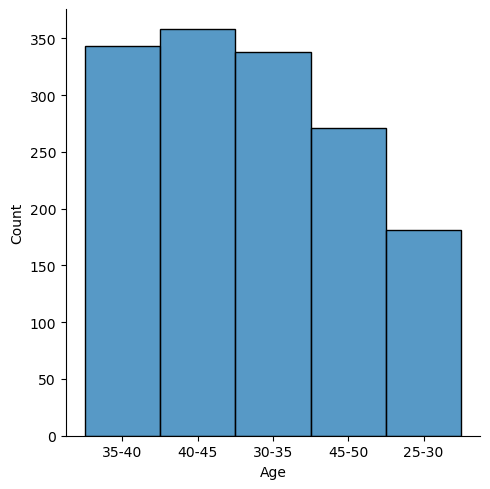

In [13]:
sns.displot(data['Age'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


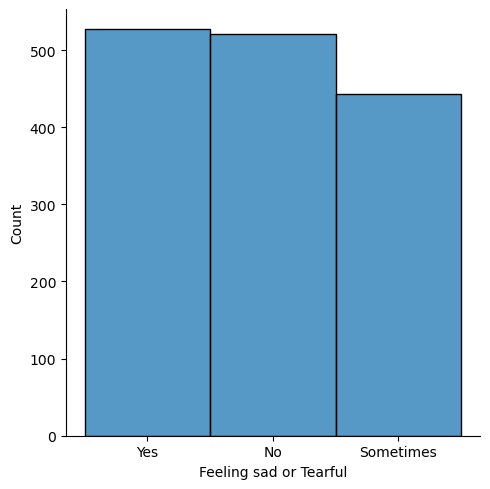

In [14]:
sns.displot(data['Feeling sad or Tearful'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


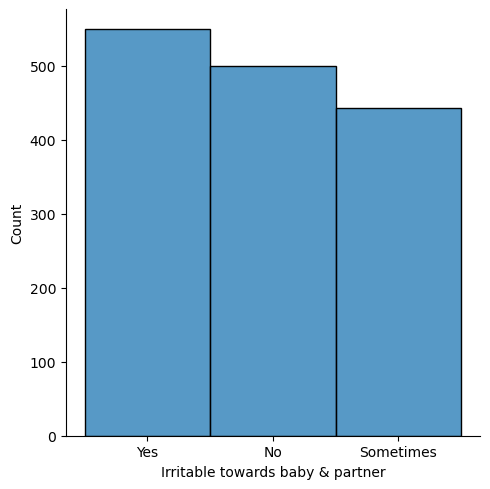

In [15]:
sns.displot(data['Irritable towards baby & partner'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


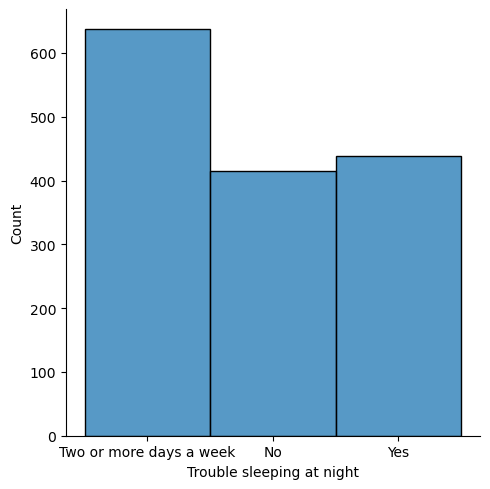

In [17]:
sns.displot(data['Trouble sleeping at night'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


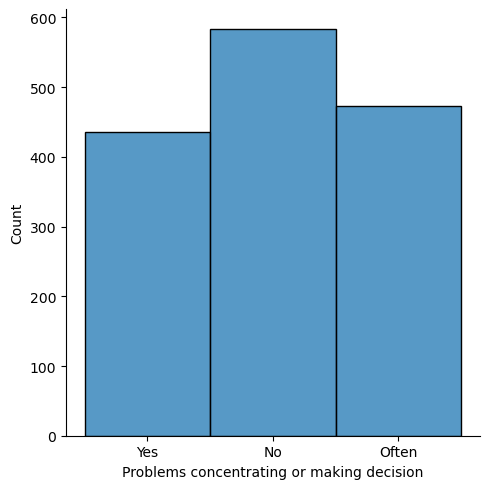

In [12]:
sns.displot(data['Problems concentrating or making decision'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


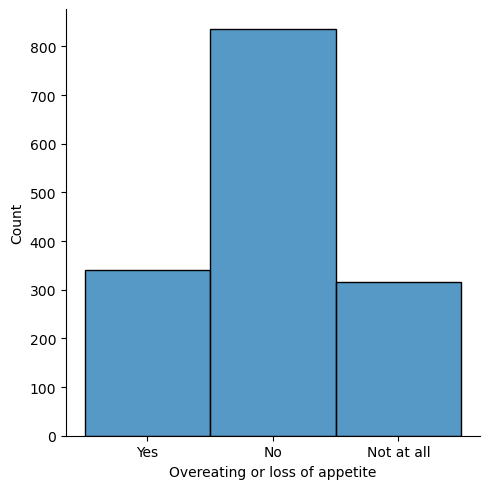

In [18]:
sns.displot(data['Overeating or loss of appetite'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


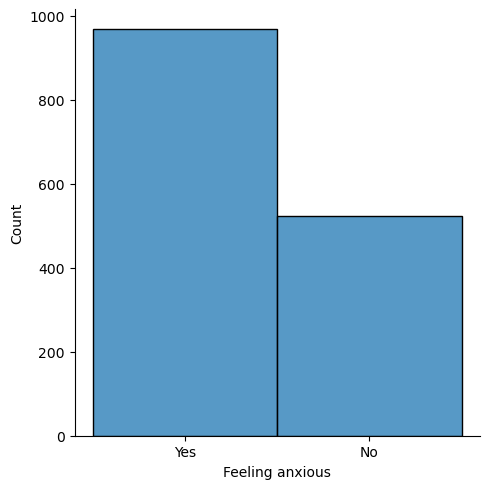

In [19]:
sns.displot(data['Feeling anxious'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


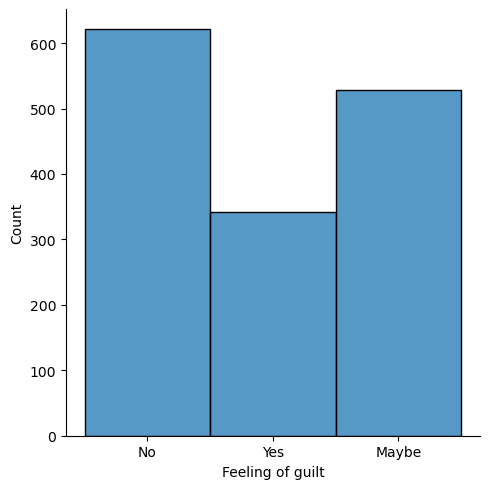

In [20]:
sns.displot(data['Feeling of guilt'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


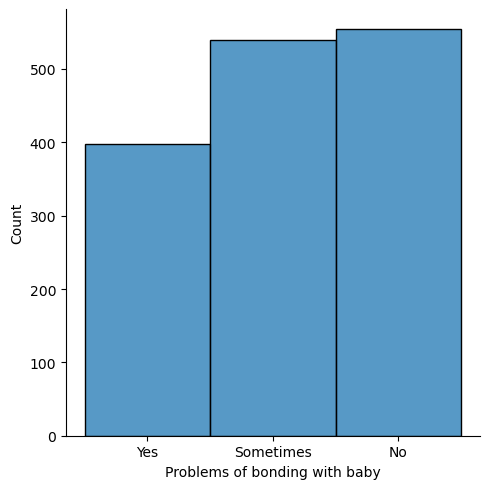

In [21]:
sns.displot(data['Problems of bonding with baby'])

d:\Programs\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


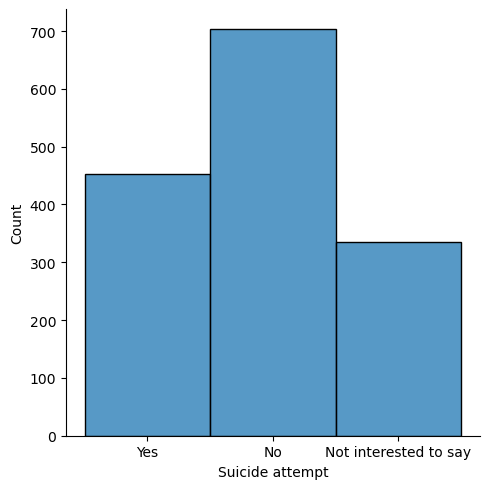

In [23]:
sns.displot(data['Suicide attempt'])

# Menganalisa siapa yuang anxiety

In [25]:
anxiety_df = data[data['Feeling anxious'] == 'Yes']
anxiety_df

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
2,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No
5,30-35,No,No,Yes,Yes,Yes,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
1496,35-40,Sometimes,Yes,Two or more days a week,Yes,No,Yes,Maybe,Sometimes,Not interested to say
1497,45-50,Yes,Yes,No,Often,Not at all,Yes,Maybe,Sometimes,No
1498,30-35,Yes,No,Two or more days a week,No,No,Yes,Maybe,Sometimes,No
1499,25-30,Sometimes,No,No,Often,No,Yes,Maybe,Yes,No


# Meng-encode kolom

In [26]:
age_dic = {'35-40':3, '40-45':4, '30-35':2,  '45-50':5, '25-30':1}
data['Age'].replace(age_dic, inplace=True)
data['Age']

0       3
1       4
2       3
3       3
4       4
       ..
1498    2
1499    1
1500    1
1501    1
1502    5
Name: Age, Length: 1491, dtype: int64

In [27]:
df_dic = {'Yes':1, 'No':0, 'Sometimes':2, 'Two or more days a week':2, 'Often':2, 'Not at all':2,'Not interested to say':2,'Maybe':2 }
data.replace(df_dic, inplace=True)
data

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,3,1,1,2,1,1,1,0,1,1
1,4,1,0,0,1,1,0,1,1,0
2,3,1,0,1,1,1,1,0,2,0
3,3,1,1,1,1,0,1,2,0,0
4,4,1,0,2,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1498,2,1,0,2,0,0,1,2,2,0
1499,1,2,0,0,2,0,1,2,1,0
1500,1,0,2,2,0,0,0,1,0,2
1501,1,0,2,1,2,0,1,0,0,0


# Persiapan modeling

In [28]:
y = data.pop('Feeling anxious')
X = data
print(X.shape, y.shape)

(1491, 9) (1491,)


# Melihat korelasi antar kolom

<Axes: >

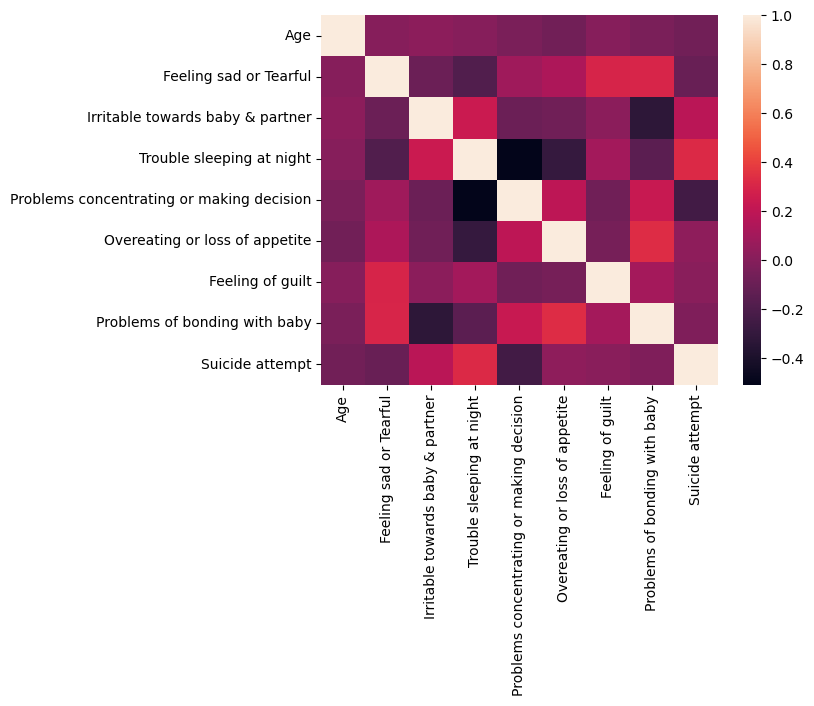

In [29]:
corr = X.corr()
sns.heatmap(corr)

# Standarisasi

In [30]:
meanX = X.mean()
stdX = np.std(X)

X = (X - meanX) / stdX
X

,Age,Feeling sad or Tearful,Irritable towards baby & partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,-0.104067,0.065199,0.047305,1.02955,0.088003,0.431485,-1.070798,0.011751,0.309667
1,0.671753,0.065199,-1.212196,-1.38977,0.088003,0.431485,0.071233,0.011751,-0.944988
2,-0.104067,0.065199,-1.212196,-0.18011,0.088003,0.431485,-1.070798,1.179794,-0.944988
3,-0.104067,0.065199,0.047305,-0.18011,0.088003,-0.808100,1.213264,-1.156292,-0.944988
4,0.671753,0.065199,-1.212196,1.02955,0.088003,-0.808100,-1.070798,0.011751,-0.944988
...,...,...,...,...,...,...,...,...,...
1498,-0.879887,0.065199,-1.212196,1.02955,-1.104837,-0.808100,1.213264,1.179794,-0.944988
1499,-1.655706,1.311495,-1.212196,-1.38977,1.280843,-0.808100,1.213264,0.011751,-0.944988
1500,-1.655706,-1.181098,1.306807,1.02955,-1.104837,-0.808100,0.071233,-1.156292,1.564322
1501,-1.655706,-1.181098,1.306807,-0.18011,1.280843,-0.808100,-1.070798,-1.156292,-0.944988


#--#